<a href="https://colab.research.google.com/github/vedantsawant/CSE512-ML-Project/blob/main/RockPaperScissors%20Architecture2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os
import zipfile  
from tensorflow.keras import regularizers

In [ ]:
!wget --no-check-certificate \
https://storage.googleapis.com/laurencemoroney-blog.appspot.com/rps.zip

!wget --no-check-certificate \
https://storage.googleapis.com/laurencemoroney-blog.appspot.com/rps-test-set.zip

--2022-12-06 03:48:12--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/rps.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.250.4.128, 74.125.24.128, 172.217.194.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.250.4.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 200682221 (191M) [application/zip]
Saving to: ‘rps.zip’

rps.zip             100%[===================>] 191.38M  22.9MB/s    in 9.8s    

2022-12-06 03:48:23 (19.6 MB/s) - ‘rps.zip’ saved [200682221/200682221]

--2022-12-06 03:48:23--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/rps-test-set.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.250.4.128, 74.125.24.128, 172.217.194.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.250.4.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 29516758 (28M) [application/zip]
Saving to: ‘rps-test-set.zip’

In [ ]:
zip_ref_train = zipfile.ZipFile('/content/rps.zip')
zip_ref_train.extractall()
zip_ref_train.close()

zip_ref_test = zipfile.ZipFile('/content/rps-test-set.zip')
zip_ref_test.extractall()
zip_ref_test.close()

In [ ]:
train_dir = '/content/rps'
test_dir = '/content/rps-test-set'

train_paper_dir = os.path.join(train_dir, 'paper')
train_rock_dir = os.path.join(train_dir, 'rock') 
train_scissors_dir = os.path.join(train_dir, 'scissors')

test_paper_dir = os.path.join(test_dir, 'paper')
test_rock_dir = os.path.join(test_dir, 'rock') 
test_scissors_dir = os.path.join(test_dir, 'scissors')

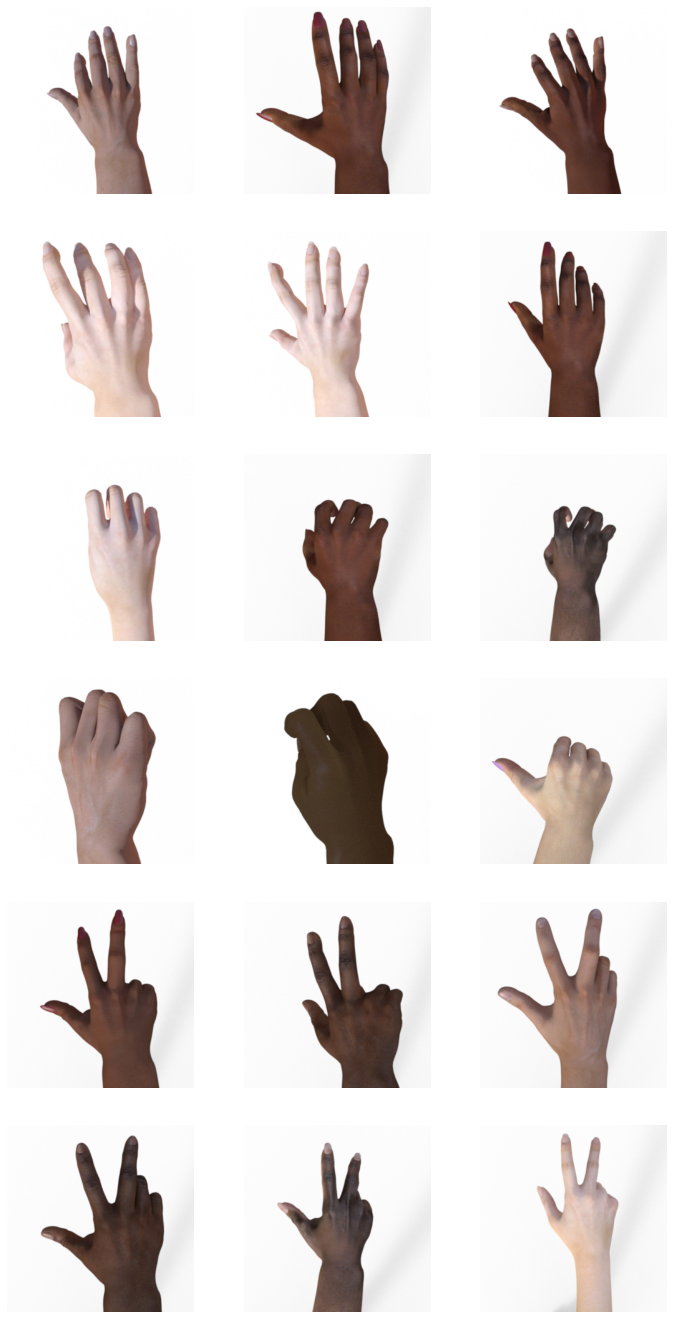

In [ ]:
ncols = 6
nrows = 3
index = 0

fig = plt.gcf()
fig.set_size_inches(nrows*4, ncols*4)

index += 6
next_paper_pix = [os.path.join(train_paper_dir, fname) for fname in os.listdir(train_paper_dir)[index-6 : index]]
next_rock_pix = [os.path.join(train_rock_dir, fname) for fname in os.listdir(train_rock_dir)[index-6 : index]]
next_scissors_pix = [os.path.join(train_scissors_dir, fname) for fname in os.listdir(train_scissors_dir)[index-6 : index]]

for i, img_path in enumerate(next_paper_pix+next_rock_pix+next_scissors_pix):
  sp = plt.subplot(ncols, nrows, i+1)
  sp.axis('off')
  img = mpimg.imread(img_path)
  # print(img.shape)
  temp = img
  plt.imshow(img)

In [ ]:
print(len(os.listdir(train_paper_dir))+len(os.listdir(train_rock_dir))+len(os.listdir(train_scissors_dir)))
print(len(os.listdir(test_paper_dir))+len(os.listdir(test_rock_dir))+len(os.listdir(test_scissors_dir)))

2520
372


### Base Model

In [ ]:
train_datagen = ImageDataGenerator(rescale = 1/255,
                                   width_shift_range = 0,
                                   height_shift_range = 0,
                                   rotation_range = 0,
                                   horizontal_flip = False,
                                   shear_range = 0,
                                   zoom_range = 0,
                                   fill_mode = 'nearest')
train_generator = train_datagen.flow_from_directory(train_dir,
                                                    batch_size = 128,
                                                    target_size = (300, 300),
                                                    class_mode = 'categorical')

test_datagen = ImageDataGenerator(rescale = 1/255.0)
test_generator = test_datagen.flow_from_directory(test_dir,
                                                  batch_size = 32,
                                                  target_size = (300, 300),
                                                  class_mode = 'categorical')

Found 2520 images belonging to 3 classes.
Found 372 images belonging to 3 classes.


In [ ]:
model = tf.keras.Sequential([tf.keras.layers.Conv2D(16, (3, 3), activation = 'relu', input_shape = (300, 300, 3)),
                             tf.keras.layers.MaxPooling2D(2, 2),
                             tf.keras.layers.Conv2D(32, (3, 3), activation = 'relu'),
                             tf.keras.layers.MaxPooling2D(2, 2),
                             tf.keras.layers.Conv2D(64, (3, 3), activation = 'relu'),
                             tf.keras.layers.MaxPooling2D(2, 2),
                             tf.keras.layers.Flatten(),
                            #  tf.keras.layers.Dropout(0.2),
                             tf.keras.layers.Dense(512, activation = 'relu'),
                            #  tf.keras.layers.Dropout(0.2),
                             tf.keras.layers.Dense(3, activation = 'softmax')])
model.compile(loss = 'categorical_crossentropy',
              optimizer = 'adam',
              metrics = ['accuracy'])

In [ ]:
history = model.fit(train_generator,
                    steps_per_epoch = 8,
                    validation_data = test_generator,
                    validation_steps = 8,
                    epochs = 50,
                    verbose = 1)

Epoch 1/50
8/8 [==============================] - 7s 810ms/step - loss: 5.3063 - accuracy: 0.3760 - val_loss: 1.1170 - val_accuracy: 0.3203
Epoch 2/50
8/8 [==============================] - 6s 726ms/step - loss: 0.9160 - accuracy: 0.5645 - val_loss: 0.9633 - val_accuracy: 0.5156
Epoch 3/50
8/8 [==============================] - 6s 710ms/step - loss: 0.5632 - accuracy: 0.8140 - val_loss: 0.7868 - val_accuracy: 0.6992
Epoch 4/50
8/8 [==============================] - 6s 740ms/step - loss: 0.2133 - accuracy: 0.9678 - val_loss: 0.6783 - val_accuracy: 0.7266
Epoch 5/50
8/8 [==============================] - 6s 764ms/step - loss: 0.1010 - accuracy: 0.9785 - val_loss: 0.6483 - val_accuracy: 0.6758
Epoch 6/50
8/8 [==============================] - 6s 744ms/step - loss: 0.0445 - accuracy: 0.9912 - val_loss: 0.4336 - val_accuracy: 0.8594
Epoch 7/50
8/8 [==============================] - 6s 711ms/step - loss: 0.0241 - accuracy: 0.9941 - val_loss: 0.8330 - val_accuracy: 0.7734
Epoch 8/50
8/8 [====

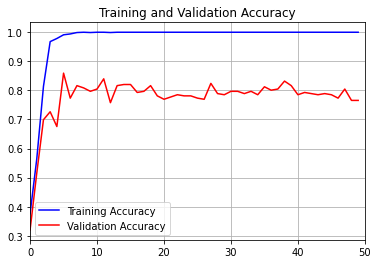

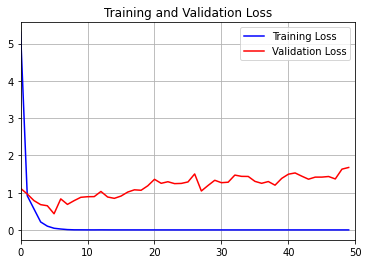

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, label = 'Training Accuracy', color = 'blue')
plt.plot(epochs, val_acc, label = 'Validation Accuracy', color = 'red')
plt.xlim([0,50])
plt.grid('on')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, label = 'Training Loss', color = 'blue')
plt.plot(epochs, val_loss, label = 'Validation Loss',color = 'red')
plt.xlim([0,50])
plt.grid('on')
plt.title('Training and Validation Loss')
plt.legend()

### L1 Regularization

In [ ]:
train_datagen = ImageDataGenerator(rescale = 1/255,
                                   width_shift_range = 0,
                                   height_shift_range = 0,
                                   rotation_range = 0,
                                   horizontal_flip = False,
                                   shear_range = 0,
                                   zoom_range = 0,
                                   fill_mode = 'nearest')
train_generator = train_datagen.flow_from_directory(train_dir,
                                                    batch_size = 128,
                                                    target_size = (300, 300),
                                                    class_mode = 'categorical')

test_datagen = ImageDataGenerator(rescale = 1/255.0)
test_generator = test_datagen.flow_from_directory(test_dir,
                                                  batch_size = 32,
                                                  target_size = (300, 300),
                                                  class_mode = 'categorical')

Found 2520 images belonging to 3 classes.
Found 372 images belonging to 3 classes.


In [ ]:
model = tf.keras.Sequential([tf.keras.layers.Conv2D(16, (3, 3), activation = 'relu', input_shape = (300, 300, 3)),
                             tf.keras.layers.MaxPooling2D(2, 2),
                             tf.keras.layers.Conv2D(32, (3, 3), activation = 'relu',kernel_regularizer=regularizers.l1(l=0.01)),
                             tf.keras.layers.MaxPooling2D(2, 2),
                             tf.keras.layers.Conv2D(64, (3, 3), activation = 'relu',kernel_regularizer=regularizers.l1(l=0.01)),
                             tf.keras.layers.MaxPooling2D(2, 2),
                             tf.keras.layers.Flatten(),
                             tf.keras.layers.Dense(512, activation = 'relu'),
                             tf.keras.layers.Dense(3, activation = 'softmax')])
model.compile(loss = 'categorical_crossentropy',
              optimizer = 'adam',
              metrics = ['accuracy'])

In [ ]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_21 (Conv2D)          (None, 298, 298, 16)      448       
                                                                 
 max_pooling2d_21 (MaxPoolin  (None, 149, 149, 16)     0         
 g2D)                                                            
                                                                 
 conv2d_22 (Conv2D)          (None, 147, 147, 32)      4640      
                                                                 
 max_pooling2d_22 (MaxPoolin  (None, 73, 73, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_23 (Conv2D)          (None, 71, 71, 64)        18496     
                                                                 
 max_pooling2d_23 (MaxPoolin  (None, 35, 35, 64)      

In [ ]:
history = model.fit(train_generator,
                    steps_per_epoch = 8,
                    validation_data = test_generator,
                    validation_steps = 8,
                    epochs = 50,
                    verbose = 1)

Epoch 1/50
8/8 [==============================] - 6s 749ms/step - loss: 20.7579 - accuracy: 0.3447 - val_loss: 10.4068 - val_accuracy: 0.3242
Epoch 2/50
8/8 [==============================] - 6s 689ms/step - loss: 9.6143 - accuracy: 0.6514 - val_loss: 9.2393 - val_accuracy: 0.6836
Epoch 3/50
8/8 [==============================] - 5s 708ms/step - loss: 8.3689 - accuracy: 0.8669 - val_loss: 8.3087 - val_accuracy: 0.6211
Epoch 4/50
8/8 [==============================] - 6s 714ms/step - loss: 7.4365 - accuracy: 0.9668 - val_loss: 7.6186 - val_accuracy: 0.6016
Epoch 5/50
8/8 [==============================] - 6s 712ms/step - loss: 6.6859 - accuracy: 0.9902 - val_loss: 6.9243 - val_accuracy: 0.7578
Epoch 6/50
8/8 [==============================] - 6s 686ms/step - loss: 6.0696 - accuracy: 0.9949 - val_loss: 6.6997 - val_accuracy: 0.7344
Epoch 7/50
8/8 [==============================] - 6s 710ms/step - loss: 5.5511 - accuracy: 0.9961 - val_loss: 6.0959 - val_accuracy: 0.7383
Epoch 8/50
8/8 [==

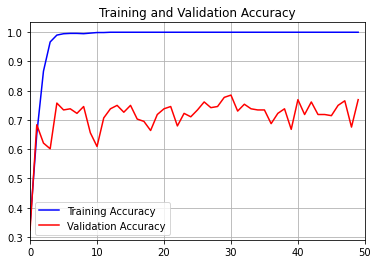

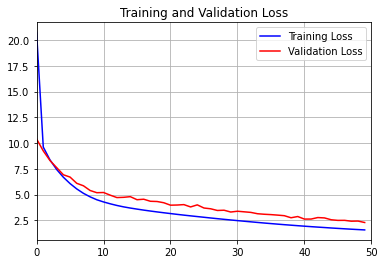

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, label = 'Training Accuracy', color = 'blue')
plt.plot(epochs, val_acc, label = 'Validation Accuracy', color = 'red')
plt.xlim([0,50])
plt.grid('on')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, label = 'Training Loss', color = 'blue')
plt.plot(epochs, val_loss, label = 'Validation Loss',color = 'red')
plt.xlim([0,50])
plt.grid('on')
plt.title('Training and Validation Loss')
plt.legend()

In [ ]:
train_generator.class_indices

{'paper': 0, 'rock': 1, 'scissors': 2}

### L2 Regularization

In [ ]:
train_datagen = ImageDataGenerator(rescale = 1/255,
                                   width_shift_range = 0,
                                   height_shift_range = 0,
                                   rotation_range = 0,
                                   horizontal_flip = False,
                                   shear_range = 0,
                                   zoom_range = 0,
                                   fill_mode = 'nearest')
train_generator = train_datagen.flow_from_directory(train_dir,
                                                    batch_size = 128,
                                                    target_size = (300, 300),
                                                    class_mode = 'categorical')

test_datagen = ImageDataGenerator(rescale = 1/255.0)
test_generator = test_datagen.flow_from_directory(test_dir,
                                                  batch_size = 32,
                                                  target_size = (300, 300),
                                                  class_mode = 'categorical')

Found 2520 images belonging to 3 classes.
Found 372 images belonging to 3 classes.


In [ ]:
model = tf.keras.Sequential([tf.keras.layers.Conv2D(16, (3, 3), activation = 'relu', input_shape = (300, 300, 3)),
                             tf.keras.layers.MaxPooling2D(2, 2),
                             tf.keras.layers.Conv2D(32, (3, 3), activation = 'relu',kernel_regularizer=regularizers.l2(l=0.01)),
                             tf.keras.layers.MaxPooling2D(2, 2),
                             tf.keras.layers.Conv2D(64, (3, 3), activation = 'relu',kernel_regularizer=regularizers.l2(l=0.01)),
                             tf.keras.layers.MaxPooling2D(2, 2),
                             tf.keras.layers.Flatten(),
                             tf.keras.layers.Dense(512, activation = 'relu'),
                             tf.keras.layers.Dense(3, activation = 'softmax')])
model.compile(loss = 'categorical_crossentropy',
              optimizer = 'adam',
              metrics = ['accuracy'])

In [ ]:
history = model.fit(train_generator,
                    steps_per_epoch = 8,
                    validation_data = test_generator,
                    validation_steps = 8,
                    epochs = 50,
                    verbose = 1)

Epoch 1/50
8/8 [==============================] - 6s 737ms/step - loss: 3.2637 - accuracy: 0.3699 - val_loss: 1.5972 - val_accuracy: 0.4141
Epoch 2/50
8/8 [==============================] - 6s 686ms/step - loss: 1.2660 - accuracy: 0.6717 - val_loss: 1.3858 - val_accuracy: 0.5625
Epoch 3/50
8/8 [==============================] - 6s 692ms/step - loss: 0.8097 - accuracy: 0.9075 - val_loss: 1.2710 - val_accuracy: 0.5586
Epoch 4/50
8/8 [==============================] - 6s 709ms/step - loss: 0.5242 - accuracy: 0.9834 - val_loss: 0.8929 - val_accuracy: 0.8164
Epoch 5/50
8/8 [==============================] - 6s 707ms/step - loss: 0.4239 - accuracy: 0.9902 - val_loss: 0.7897 - val_accuracy: 0.8398
Epoch 6/50
8/8 [==============================] - 6s 704ms/step - loss: 0.3733 - accuracy: 0.9980 - val_loss: 0.9721 - val_accuracy: 0.7812
Epoch 7/50
8/8 [==============================] - 5s 678ms/step - loss: 0.3492 - accuracy: 0.9970 - val_loss: 1.1140 - val_accuracy: 0.7656
Epoch 8/50
8/8 [====

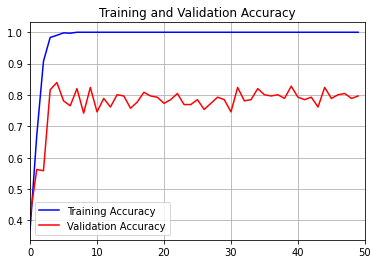

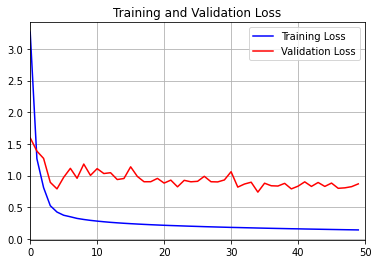

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, label = 'Training Accuracy', color = 'blue')
plt.plot(epochs, val_acc, label = 'Validation Accuracy', color = 'red')
plt.xlim([0,50])
plt.grid('on')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, label = 'Training Loss', color = 'blue')
plt.plot(epochs, val_loss, label = 'Validation Loss',color = 'red')
plt.xlim([0,50])
plt.grid('on')
plt.title('Training and Validation Loss')
plt.legend()

### Augmentation

In [ ]:
train_datagen = ImageDataGenerator(rescale = 1/255,
                                   width_shift_range = 0.2,
                                   height_shift_range = 0.2,
                                   rotation_range = 40,
                                   horizontal_flip = True,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   fill_mode = 'nearest')
train_generator = train_datagen.flow_from_directory(train_dir,
                                                    batch_size = 128,
                                                    target_size = (300, 300),
                                                    class_mode = 'categorical')

test_datagen = ImageDataGenerator(rescale = 1/255.0)
test_generator = test_datagen.flow_from_directory(test_dir,
                                                  batch_size = 32,
                                                  target_size = (300, 300),
                                                  class_mode = 'categorical')

Found 2520 images belonging to 3 classes.
Found 372 images belonging to 3 classes.


In [ ]:
model = tf.keras.Sequential([tf.keras.layers.Conv2D(16, (3, 3), activation = 'relu', input_shape = (300, 300, 3)),
                             tf.keras.layers.MaxPooling2D(2, 2),
                             tf.keras.layers.Conv2D(32, (3, 3), activation = 'relu'),
                             tf.keras.layers.MaxPooling2D(2, 2),
                             tf.keras.layers.Conv2D(64, (3, 3), activation = 'relu'),
                             tf.keras.layers.MaxPooling2D(2, 2),
                             tf.keras.layers.Flatten(),
                             tf.keras.layers.Dense(512, activation = 'relu'),
                             tf.keras.layers.Dense(3, activation = 'softmax')])
model.compile(loss = 'categorical_crossentropy',
              optimizer = 'adam',
              metrics = ['accuracy'])

In [ ]:
history = model.fit(train_generator,
                    steps_per_epoch = 8,
                    validation_data = test_generator,
                    validation_steps = 8,
                    epochs = 50,
                    verbose = 1)

Epoch 1/50
8/8 [==============================] - 22s 3s/step - loss: 1.6251 - accuracy: 0.3887 - val_loss: 1.0340 - val_accuracy: 0.4570
Epoch 2/50
8/8 [==============================] - 21s 3s/step - loss: 1.0375 - accuracy: 0.4375 - val_loss: 0.9196 - val_accuracy: 0.5820
Epoch 3/50
8/8 [==============================] - 21s 3s/step - loss: 0.9435 - accuracy: 0.5457 - val_loss: 0.7043 - val_accuracy: 0.7266
Epoch 4/50
8/8 [==============================] - 21s 3s/step - loss: 0.8435 - accuracy: 0.5996 - val_loss: 0.8882 - val_accuracy: 0.4102
Epoch 5/50
8/8 [==============================] - 21s 3s/step - loss: 0.8054 - accuracy: 0.6260 - val_loss: 0.5975 - val_accuracy: 0.8164
Epoch 6/50
8/8 [==============================] - 21s 3s/step - loss: 0.7472 - accuracy: 0.6631 - val_loss: 0.6553 - val_accuracy: 0.6445
Epoch 7/50
8/8 [==============================] - 21s 3s/step - loss: 0.6511 - accuracy: 0.7033 - val_loss: 0.5078 - val_accuracy: 0.7070
Epoch 8/50
8/8 [==================

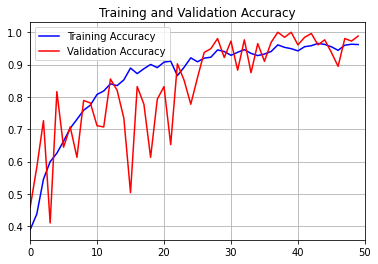

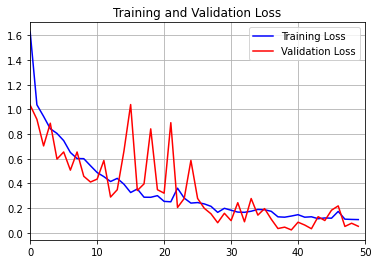

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, label = 'Training Accuracy', color = 'blue')
plt.plot(epochs, val_acc, label = 'Validation Accuracy', color = 'red')
plt.xlim([0,50])
plt.grid('on')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, label = 'Training Loss', color = 'blue')
plt.plot(epochs, val_loss, label = 'Validation Loss',color = 'red')
plt.xlim([0,50])
plt.grid('on')
plt.title('Training and Validation Loss')
plt.legend()

### Dropout

In [ ]:
train_datagen = ImageDataGenerator(rescale = 1/255,
                                   width_shift_range = 0,
                                   height_shift_range = 0,
                                   rotation_range = 0,
                                   horizontal_flip = False,
                                   shear_range = 0,
                                   zoom_range = 0,
                                   fill_mode = 'nearest')
train_generator = train_datagen.flow_from_directory(train_dir,
                                                    batch_size = 128,
                                                    target_size = (300, 300),
                                                    class_mode = 'categorical')

test_datagen = ImageDataGenerator(rescale = 1/255.0)
test_generator = test_datagen.flow_from_directory(test_dir,
                                                  batch_size = 32,
                                                  target_size = (300, 300),
                                                  class_mode = 'categorical')

Found 2520 images belonging to 3 classes.
Found 372 images belonging to 3 classes.


In [ ]:
model = tf.keras.Sequential([tf.keras.layers.Conv2D(16, (3, 3), activation = 'relu', input_shape = (300, 300, 3)),
                             tf.keras.layers.MaxPooling2D(2, 2),
                             tf.keras.layers.Conv2D(32, (3, 3), activation = 'relu'),
                             tf.keras.layers.MaxPooling2D(2, 2),
                             tf.keras.layers.Conv2D(64, (3, 3), activation = 'relu'),
                             tf.keras.layers.MaxPooling2D(2, 2),
                             tf.keras.layers.Flatten(),
                             tf.keras.layers.Dropout(0.2),
                             tf.keras.layers.Dense(512, activation = 'relu'),
                             tf.keras.layers.Dropout(0.2),
                             tf.keras.layers.Dense(3, activation = 'softmax')])
model.compile(loss = 'categorical_crossentropy',
              optimizer = 'adam',
              metrics = ['accuracy'])

In [ ]:
history = model.fit(train_generator,
                    steps_per_epoch = 8,
                    validation_data = test_generator,
                    validation_steps = 8,
                    epochs = 50,
                    verbose = 1)

Epoch 1/50
8/8 [==============================] - 7s 752ms/step - loss: 9.9410 - accuracy: 0.3105 - val_loss: 1.1688 - val_accuracy: 0.3398
Epoch 2/50
8/8 [==============================] - 6s 708ms/step - loss: 0.9502 - accuracy: 0.5371 - val_loss: 1.0358 - val_accuracy: 0.4297
Epoch 3/50
8/8 [==============================] - 6s 712ms/step - loss: 0.5756 - accuracy: 0.7715 - val_loss: 0.9559 - val_accuracy: 0.5938
Epoch 4/50
8/8 [==============================] - 6s 689ms/step - loss: 0.3179 - accuracy: 0.9045 - val_loss: 0.8096 - val_accuracy: 0.7305
Epoch 5/50
8/8 [==============================] - 6s 683ms/step - loss: 0.1726 - accuracy: 0.9512 - val_loss: 1.0568 - val_accuracy: 0.5391
Epoch 6/50
8/8 [==============================] - 6s 722ms/step - loss: 0.0978 - accuracy: 0.9785 - val_loss: 0.8677 - val_accuracy: 0.7344
Epoch 7/50
8/8 [==============================] - 6s 707ms/step - loss: 0.0639 - accuracy: 0.9824 - val_loss: 1.0963 - val_accuracy: 0.7227
Epoch 8/50
8/8 [====

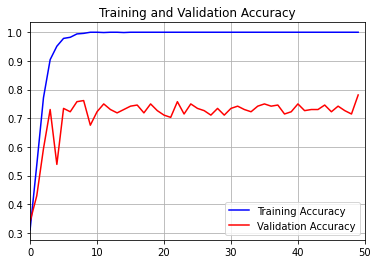

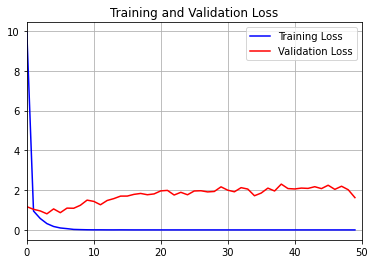

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, label = 'Training Accuracy', color = 'blue')
plt.plot(epochs, val_acc, label = 'Validation Accuracy', color = 'red')
plt.xlim([0,50])
plt.grid('on')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, label = 'Training Loss', color = 'blue')
plt.plot(epochs, val_loss, label = 'Validation Loss',color = 'red')
plt.xlim([0,50])
plt.grid('on')
plt.title('Training and Validation Loss')
plt.legend()

###DropConnect

In [ ]:
train_datagen = ImageDataGenerator(rescale = 1/255,
                                   width_shift_range = 0,
                                   height_shift_range = 0,
                                   rotation_range = 0,
                                   horizontal_flip = False,
                                   shear_range = 0,
                                   zoom_range = 0,
                                   fill_mode = 'nearest')
train_generator = train_datagen.flow_from_directory(train_dir,
                                                    batch_size = 128,
                                                    target_size = (300, 300),
                                                    class_mode = 'categorical')

test_datagen = ImageDataGenerator(rescale = 1/255.0)
test_generator = test_datagen.flow_from_directory(test_dir,
                                                  batch_size = 32,
                                                  target_size = (300, 300),
                                                  class_mode = 'categorical')

Found 2520 images belonging to 3 classes.
Found 372 images belonging to 3 classes.


In [ ]:
pip install dropconnect-tensorflow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from dropconnect_tensorflow import DropConnectDense

model = tf.keras.Sequential([tf.keras.layers.Conv2D(16, (3, 3), activation = 'relu', input_shape = (300, 300, 3)),
                             tf.keras.layers.MaxPooling2D(2, 2),
                             tf.keras.layers.Conv2D(32, (3, 3), activation = 'relu'),
                             tf.keras.layers.MaxPooling2D(2, 2),
                             tf.keras.layers.Conv2D(64, (3, 3), activation = 'relu'),
                             tf.keras.layers.MaxPooling2D(2, 2),
                             tf.keras.layers.Flatten(),
                             tf.keras.layers.Dense(512, activation = 'relu'),
                             DropConnectDense(units=64, prob=0.2, activation="relu", use_bias=True),
                             tf.keras.layers.Dense(3, activation = 'softmax')])
model.compile(loss = 'categorical_crossentropy',
              optimizer = 'adam',
              metrics = ['accuracy'])

In [ ]:
model.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_33 (Conv2D)          (None, 298, 298, 16)      448       
                                                                 
 max_pooling2d_33 (MaxPoolin  (None, 149, 149, 16)     0         
 g2D)                                                            
                                                                 
 conv2d_34 (Conv2D)          (None, 147, 147, 32)      4640      
                                                                 
 max_pooling2d_34 (MaxPoolin  (None, 73, 73, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_35 (Conv2D)          (None, 71, 71, 64)        18496     
                                                                 
 max_pooling2d_35 (MaxPoolin  (None, 35, 35, 64)     

In [ ]:
history = model.fit(train_generator,
                    steps_per_epoch = 8,
                    validation_data = test_generator,
                    validation_steps = 8,
                    epochs = 50,
                    verbose = 1)

Epoch 1/50
8/8 [==============================] - 7s 759ms/step - loss: 1.2213 - accuracy: 0.4658 - val_loss: 0.9756 - val_accuracy: 0.5352
Epoch 2/50
8/8 [==============================] - 6s 699ms/step - loss: 0.5926 - accuracy: 0.7900 - val_loss: 0.8771 - val_accuracy: 0.5703
Epoch 3/50
8/8 [==============================] - 6s 701ms/step - loss: 0.2996 - accuracy: 0.8975 - val_loss: 0.5546 - val_accuracy: 0.8281
Epoch 4/50
8/8 [==============================] - 6s 691ms/step - loss: 0.0812 - accuracy: 0.9844 - val_loss: 0.7299 - val_accuracy: 0.7734
Epoch 5/50
8/8 [==============================] - 6s 696ms/step - loss: 0.0234 - accuracy: 0.9951 - val_loss: 0.9514 - val_accuracy: 0.7539
Epoch 6/50
8/8 [==============================] - 5s 710ms/step - loss: 0.0106 - accuracy: 0.9959 - val_loss: 1.5305 - val_accuracy: 0.7578
Epoch 7/50
8/8 [==============================] - 5s 685ms/step - loss: 0.0021 - accuracy: 1.0000 - val_loss: 1.5752 - val_accuracy: 0.7891
Epoch 8/50
8/8 [====

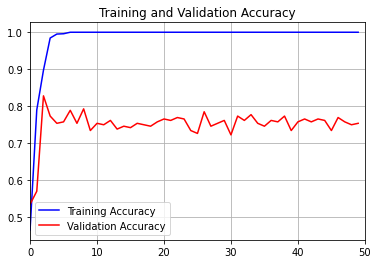

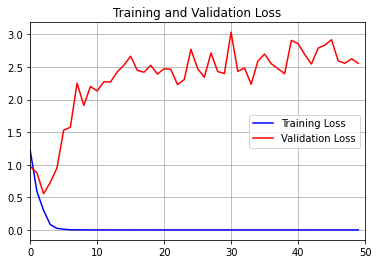

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, label = 'Training Accuracy', color = 'blue')
plt.plot(epochs, val_acc, label = 'Validation Accuracy', color = 'red')
plt.xlim([0,50])
plt.grid('on')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, label = 'Training Loss', color = 'blue')
plt.plot(epochs, val_loss, label = 'Validation Loss',color = 'red')
plt.xlim([0,50])
plt.grid('on')
plt.title('Training and Validation Loss')
plt.legend()